In [1]:
# Add parent directory
from sys import path as sysPath
sysPath.append('../')

# Add custom modules
sysPath.append('../Machine_Score/')

from Support_Code import general_module as gm
from Support_Code import info_module as im
from Image_Creator import main_image_creator as ic
from Machine_Score import main_machine_score as ms
from Machine_Score import direct_image_compare as dc
from Score_Analysis import main_score_analysis as sa
import main_SIMR as simr

# General modules
from os import path
import numpy as np
from matplotlib import pyplot as plt

sa.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
simr.test()

SA: Hi!  You're in Matthew's Main program for score analysis!
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions


In [2]:
tDir = '../../587722984435351614/'

tInfo = im.target_info_class( targetDir = tDir, printAll=True)

if tInfo.status == False:
    print("WARNING")
else:
    print("Target Good!")

IM: target_info_class.__init__:
	 - targetDir:  ../../587722984435351614/
IM: Target.initTargetDir():
	 - targetDir: ../../587722984435351614/
NEW PATH EXISTS: /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/zoo_merger_models/
	 - targetDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/
	 - infoDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/information/
	 - baseInfoLoc: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/information/base_target_info.json
	 - allInfoLoc: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/information/target_info.json
	 - zooMergerDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/zoo_merger_models/
	 - plotDir: (True) /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/587722984435351614/plots/
IM: Target: Opening target info json
Target Good!


In [4]:
tScores = tInfo.getScores()
print(tScores)

      run_id  zoo_merger_score  base0_corr  base0_diff  base0_diff_scale  \
0     r00002          0.918919    0.793071    0.960612          0.606118   
1     r00001          0.941176    0.737633    0.946880          0.468803   
2     r00000          0.945946         NaN         NaN               NaN   
3     r00004          0.916667    0.730096    0.971077          0.710774   
4     r00005          0.914286    0.791849    0.960645          0.606450   
...      ...               ...         ...         ...               ...   
1288  r01288          0.000000    0.797219    0.982800          0.827998   
1289  r01289          0.000000    0.775788    0.982574          0.825738   
1290  r01290          0.000000    0.831271    0.978670          0.786696   
1291  r01291          0.000000    0.818303    0.983395          0.833947   
1292  r01292          0.000000    0.840964    0.982128          0.821277   

      base0_diff_scale1  base0_diff_scale2  base0_overlap0  base0_overlap1  \
0        

In [5]:

#target_report_1(tInfo=tInfo)
tmp = '''
from os import listdir

dDir = gm.validPath( '../../tmp_scores' )
plotDir = gm.validPath( '../../tmp_plots' )
tList = listdir( dDir )
print(plotDir)

for tName in tList:
    
    sLoc = gm.validPath( dDir + tName + '/information/scores.csv' )
    pLoc = plotDir + tName + '.png'
    print(pLoc)
    
    if sLoc == None:
        continue
    
    #scores = gm.getScores(sLoc)
    
    target_report_1( scoreLoc = sLoc, plotLoc = pLoc )
'''



Target Machine Scores Found: 14
	 - base0_corr
	 - base0_diff
	 - base0_diff_scale
	 - base0_diff_scale1
	 - base0_diff_scale2
	 - base0_overlap0
	 - base0_overlap1
	 - base0_overlap2
	 - base0_overlap3
	 - base0_bcorr0
	 - base0_bcorr1
	 - base0_bcorr2
	 - base0_bcorr3
	 - base_score
Perturbation Scores Found: 1
	 - base_perturbation
Unknown Scores Found: 0
SA: target report 2: Hard coded perturbation:  base_perturbation
base0_corr: 1288/1293 -0.17887593733018536
base0_diff: 1288/1293 -0.22597724579924527
base0_diff_scale: 1288/1293 -0.32255402451154425
base0_diff_scale1: 1288/1293 -0.22597724579924536
base0_diff_scale2: 1288/1293 -0.22597724579924547
base0_overlap0: 1288/1293 -0.2748220850864178
base0_overlap1: 1288/1293 -0.4005649203111967
base0_overlap2: 1288/1293 0.05491965789683631
base0_overlap3: 1288/1293 -0.3923486304981964
base0_bcorr0: 1288/1293 -0.3290031465780685
base0_bcorr1: 1288/1293 -0.40067889279326907
base0_bcorr2: 1288/1293 -0.396771326793213
base0_bcorr3: 1288/1293

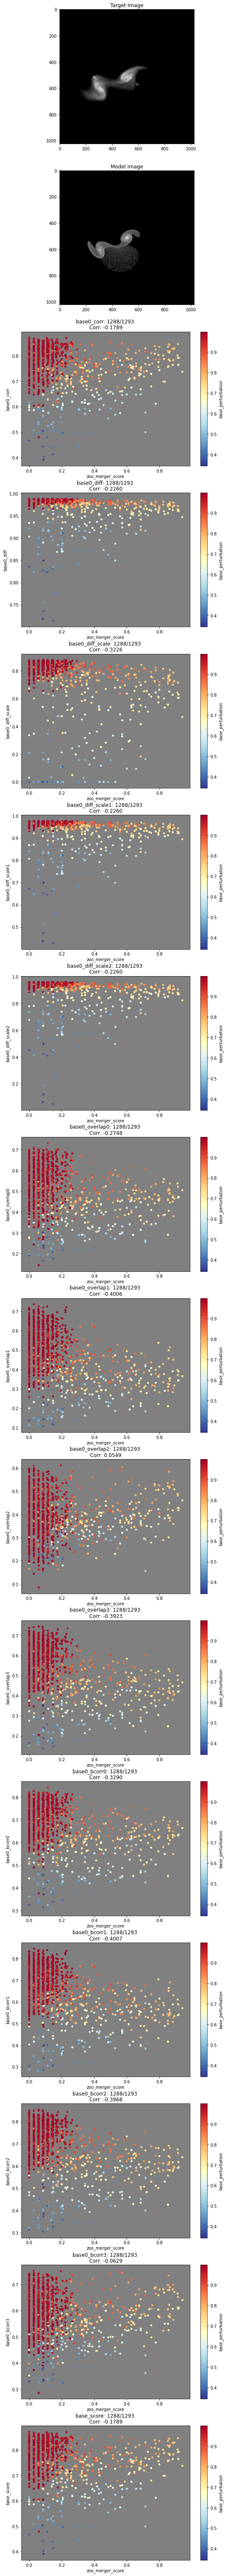

In [6]:


def target_report_2( tInfo=None, printBase = True, printAll = False ):
    
    from copy import deepcopy
    
    scores = tInfo.getScores()
    scoreHeaders = list( scores.columns )
    allParams = tInfo.get('score_parameters')

    targKeys = []
    pertKeys = []
    unknKeys = []
    
    for pKey in allParams:
        if allParams[pKey]['scoreType'] == 'target':
            targKeys.append(pKey)
        elif allParams[pKey]['scoreType'] == 'perturbation':
            pertKeys.append(pKey)
        else:
            unknKeys.append(pKey)
    
    print("Target Machine Scores Found:", len(targKeys))
    for name in targKeys: gm.tabprint(name)
        
    print("Perturbation Scores Found:", len(pertKeys))
    for name in pertKeys: gm.tabprint(name)
        
    print("Unknown Scores Found:", len(unknKeys))
    for name in unknKeys: gm.tabprint(name)
    
    pertName = 'base_perturbation'
    if printBase: print("SA: target report 2: Hard coded perturbation: ",pertName)
        
    if allParams.get(pertName) == None:
        print("SA: target report 2: Base Perturbation Not found:")
        gm.tabprint('target: %s'%tInfo.get('target_id'))
        gm.tabprint("perturb: %s"%pertName)
        
    n = len(targKeys)
    
    fig, axs = plt.subplots( n+2, figsize=(9,7*(n+2)) )  
    
        
    # Show target image
    tImg = tInfo.getTargetImage( 'zoo' )
    axs[0].imshow(tImg, cmap='gray')
    axs[0].set_title("Target Image")

    # Show a model image
    rId = 'r00001'
    runArg = gm.inArgClass()
    runArg.setArg("printBase",False)
    rInfo = tInfo.getRunInfo(rID=rId, rArg = runArg)
    rImg = rInfo.getModelImg( )
    rN = scores.shape[0]

    if type(rImg) != type(None):
        axs[1].imshow(rImg, cmap='gray')
        axs[1].set_title('Model Image')

    # Go through and plot Target Machine Scores
    for i, sName in enumerate(targKeys):     
        
        hmScores = scores[['zoo_merger_score',sName,pertName]].dropna()
        hScores = hmScores['zoo_merger_score'].values
        mScores = hmScores[sName].values
        pScores = hmScores[pertName].values
        
        corr = np.corrcoef( hScores, mScores )[0,1]
        
        print('%s: %4d/%4d' % (sName,hmScores.shape[0],rN), corr)
        
        hs = { 'scores':hScores, 'name':'zoo_merger_score' }
        ms = { 'scores':mScores, 'name':sName }   
        ps = { 'scores':pScores, 'name':pertName }
                
        title = '%s: %4d/%4d ' % (sName,hmScores.shape[0],rN) 
        title += '\nCorr: %.4f' % corr
        
        sa.basicHeatSubPlot( fig, axs[i+2], hs, ms, ps, titleName=title)        
        
    return None  

    plt.tight_layout()
    
    if tInfo != None:
        plotLoc = tInfo.plotDir + 'basic_target_report_2.pdf'
        print('PLotLoc: ', plotLoc)
        fig.savefig(plotLoc, bbox_inches='tight')
        
target_report_2(tInfo = tInfo)